# 対話状態として1つになった音声を作成します

In [14]:
from pathlib import Path

# 台本を指定
# dialogue_info_txt = "../dataset/out_LINE_woITAKO/dialogue_info.txt"
dialogue_info_txt = "../dataset/out_LINE_woITAKO_before_emotion/dialogue_info.txt"
# 音声を指定
Teacher_voice_base = Path("recipes/fastspeech2wContexts/exp/LINE_wContextwProsody_2_sr22050_LINE_wContextwProsody_13/synthesis_fastspeech2wGMMwContextswProsody_hifigan/eval")
Mstudent_voice_base = Path("../dataset/out_LINE_MStudent/LINE_MStudent/wav")
Fstudent_voice_base = Path("../dataset/out_LINE_FStudent/LINE_FStudent/wav")

# 出力したいダイアログ名を指定
output_dialogue_names = ["LD12-Dialogue-07", "LD11-Dialogue-05", "LD14-Dialogue-08", "LD13-Dialogue-03"]

# 出力先
output_base = Path("dialogue_output_LINE_wContextwProsody_13_fastspeech2wGMMwContextswProsody+1つ前emotion+当該prosody")

output_base.mkdir(parents=True, exist_ok=True)

# 間に挟む無音時間(s)
silence = 0.2

# sampling rate
sampling_rate = 22050

## 実行

In [15]:
import numpy as np
import librosa
from scipy.io import wavfile

with open(dialogue_info_txt, 'r') as f:
    dialogue_info = f.readlines()

def get_dialogue(dialogue_info, dialogue_name):
    output = []
    for dialogue_txt in dialogue_info:
        if dialogue_name in dialogue_txt:
            output.append(dialogue_txt.strip())
    return output
    
for output_dialogue_name in output_dialogue_names:
    dialogues = get_dialogue(dialogue_info, output_dialogue_name)
    output_wav = []
    for txt in dialogues:
        name = txt.split(":")[0]
        spk = name.split("_")[0]
        if spk == "PAD":
            continue
        elif spk == "Teacher":
            wav_path = Teacher_voice_base / (name + ".wav")
        elif spk == "MStudent":
            wav_path = Mstudent_voice_base / (name + ".wav")
        elif spk == "FStudent":
            wav_path = Fstudent_voice_base / (name + ".wav")  
        _sr, x = wavfile.read(wav_path)
        if x.dtype in [np.int16, np.int32]:
            x = (x / np.iinfo(x.dtype).max).astype(np.float64)
        wav = librosa.resample(x, _sr, sampling_rate)
        output_wav += list(wav)
        output_wav += [0.0] * int(sampling_rate * silence)

    output_path = output_base / (output_dialogue_name + '.wav')
    output_wav = (np.array(output_wav) * np.iinfo(np.int16).max).astype(np.int16)
    wavfile.write(output_path, sampling_rate, output_wav)

/tmp/ipykernel_112324/3943474037.py:29: WavFileWarning: Chunk (non-data) not understood, skipping it.
  _sr, x = wavfile.read(wav_path)
/tmp/ipykernel_112324/3943474037.py:29: WavFileWarning: Chunk (non-data) not understood, skipping it.
  _sr, x = wavfile.read(wav_path)


### (メモ)おすすめdialogueリスト

すべて, eval内から選出

LD12-Dialogue-07: Angry
```
PAD_LD12-Dialogue-07-PAD-Turn-00_PAD:118:0:生徒が部活動の顧問に怒られて不機嫌そうにしているので、講師が生徒に話を聞いてみる
Teacher_LD12-Dialogue-07-Teacher-Turn-01_Normal:118:1:こんにちは！
MStudent_LD12-Dialogue-07-MStudent-Turn-01_Angry:118:2:先生、聞いてくださいよ！俺、納得いかないことがあるんです！
Teacher_LD12-Dialogue-07-Teacher-Turn-02_Normal:118:3:どうしたの？そんな不機嫌そうな顔で。
MStudent_LD12-Dialogue-07-MStudent-Turn-02_Angry:118:4:今日、朝練に遅刻しちゃったんですよ。そうしたら顧問の先生が怒って、「遅刻するやつはもう練習に来なくていい！」って、言われて！
Teacher_LD12-Dialogue-07-Teacher-Turn-03_Normal:118:5:そうだったの。どうして遅刻したの？
MStudent_LD12-Dialogue-07-MStudent-Turn-03_Normal:118:6:登校中に泣いている小学生がいたから、声をかけたんです。走っていたら転んじゃったらしくて。それで、小学校までおぶって行ってあげたんですよ。それで遅れたんです！
Teacher_LD12-Dialogue-07-Teacher-Turn-04_Normal:118:7:いいことしたねー！そのことは顧問の先生に説明したの？
MStudent_LD12-Dialogue-07-MStudent-Turn-04_Angry:118:8:結局、朝練は参加させてもらえなかったんですけど、昼休みに話をしに行きました。それで、放課後の練習は参加させてもらったんですけど。でも、俺が一番怒ってるのは、朝練に参加できなかったことじゃないんですよ！
Teacher_LD12-Dialogue-07-Teacher-Turn-05_Normal:118:9:じゃあ、何に腹が立ったの？
MStudent_LD12-Dialogue-07-MStudent-Turn-05_Angry:118:10:その顧問の先生が、俺の話を聞かずに、頭ごなしに怒鳴ったことですよ！俺は寝坊したわけでもないのに！
Teacher_LD12-Dialogue-07-Teacher-Turn-06_Angry:118:11:たしかに、それは腹が立っても仕方ないと思うよ！せめて話は聞いてほしかったよねー？
MStudent_LD12-Dialogue-07-MStudent-Turn-06_Sad:118:12:そうです。朝からいいことしたなって思ってたんですけど、そのことがあって気分が下がりましたよ。
Teacher_LD12-Dialogue-07-Teacher-Turn-07_Happy:118:13:そうだよねー。でも、あなたはその小学生の子にとってヒーローみたいだったと思うよ！
MStudent_LD12-Dialogue-07-MStudent-Turn-07_Happy:118:14:そう、ですよね！そう思ってもらえていたら、俺もうれしいです！
Teacher_LD12-Dialogue-07-Teacher-Turn-08_Happy:118:15:きっとそうだと思うな！元気出しなよ！
MStudent_LD12-Dialogue-07-MStudent-Turn-08_Happy:118:16:そうします。ありがとうございます、先生！
```

LD11-Dialogue-05: Sad
```
PAD_LD11-Dialogue-05-PAD-Turn-00_PAD:13:0:生徒が部活動に関するイベントがうまくいかなかったようで、悲しそうにしているので、講師が生徒に話を聞いてみる
Teacher_LD11-Dialogue-05-Teacher-Turn-01_Normal:13:1:どうしたー？何か元気ないけど。
MStudent_LD11-Dialogue-05-MStudent-Turn-01_Sad:13:2:先生…。ちょっと、悲しいお知らせが。
Teacher_LD11-Dialogue-05-Teacher-Turn-02_Sad:13:3:なになに、どうした？
MStudent_LD11-Dialogue-05-MStudent-Turn-02_Sad:13:4:先週、部活の大会があって。
Teacher_LD11-Dialogue-05-Teacher-Turn-03_Normal:13:5:うんうん。こないだ言ってたね。
MStudent_LD11-Dialogue-05-MStudent-Turn-03_Sad:13:6:自己ベストをねらってたんですけど…。
Teacher_LD11-Dialogue-05-Teacher-Turn-04_Sad:13:7:ダメだった？
MStudent_LD11-Dialogue-05-MStudent-Turn-04_Sad:13:8:はい。自己ベスト以前に、予選敗退でした。
Teacher_LD11-Dialogue-05-Teacher-Turn-05_Sad:13:9:それは残念だったねー…。
MStudent_LD11-Dialogue-05-MStudent-Turn-05_Sad:13:10:もうショックすぎて。
Teacher_LD11-Dialogue-05-Teacher-Turn-06_Normal:13:11:大丈夫？あまり引きずらないことが大事よ。
MStudent_LD11-Dialogue-05-MStudent-Turn-06_Normal:13:12:ですよね。切り替えなくちゃ。
Teacher_LD11-Dialogue-05-Teacher-Turn-07_Normal:13:13:また大会あるんでしょう？
MStudent_LD11-Dialogue-05-MStudent-Turn-07_Normal:13:14:はい、9月に。
Teacher_LD11-Dialogue-05-Teacher-Turn-08_Normal:13:15:まだまだチャンスあるよ！頑張ろう！
```

LD14-Dialogue-08: Happy
```
PAD_LD14-Dialogue-08-PAD-Turn-00_PAD:58:0:天気が良くて生徒が嬉しそうにしている
FStudent_LD14-Dialogue-08-FStudent-Turn-01_Happy:58:1:今日は、塾が終わったら、家族で出かけるんです。
Teacher_LD14-Dialogue-08-Teacher-Turn-01_Happy:58:2:そうなんだ！天気もいいし、よかったね！
FStudent_LD14-Dialogue-08-FStudent-Turn-02_Happy:58:3:はい。先週、雨で流れたんで、なおさら嬉しいです。
Teacher_LD14-Dialogue-08-Teacher-Turn-02_Normal:58:4:どこへいくの？
FStudent_LD14-Dialogue-08-FStudent-Turn-03_Happy:58:5:ドッグランに行くんです。
Teacher_LD14-Dialogue-08-Teacher-Turn-03_Happy:58:6:そっか！わんちゃんたちも喜ぶね！
FStudent_LD14-Dialogue-08-FStudent-Turn-04_Happy:58:7:はい。室内飼いのせいか、外に出ると、すごくはしゃぎ回るんですよ。
Teacher_LD14-Dialogue-08-Teacher-Turn-04_Happy:58:8:あなたもはしゃぎ回りそうだよね！
FStudent_LD14-Dialogue-08-FStudent-Turn-05_Happy:58:9:まあ、確かに、ちょっとテンション上がりますけど。
Teacher_LD14-Dialogue-08-Teacher-Turn-05_Happy:58:10:ちょっとー？
FStudent_LD14-Dialogue-08-FStudent-Turn-06_Happy:58:11:いや、だいぶかな。
Teacher_LD14-Dialogue-08-Teacher-Turn-06_Happy:58:12:だよね！すごく嬉しそうだもん！
FStudent_LD14-Dialogue-08-FStudent-Turn-07_Happy:58:13:いやー、もう、楽しみで。天気もいいから、いろんな犬がたくさんきていると思うんです。
Teacher_LD14-Dialogue-08-Teacher-Turn-07_Normal:58:14:じゃあ、残りは宿題ってならないように、集中して問題を解こうね！
FStudent_LD14-Dialogue-08-FStudent-Turn-08_Happy:58:15:はーい！頑張ります。
```

LD13-Dialogue-03: Normal
```
PAD_LD13-Dialogue-03-PAD-Turn-00_PAD:25:0:生徒が家族と喧嘩したようで、不機嫌そうにしているので、講師が生徒に話を聞いてみる
MStudent_LD13-Dialogue-03-MStudent-Turn-01_Angry:25:1:うわ、きっつー。
Teacher_LD13-Dialogue-03-Teacher-Turn-01_Normal:25:2:どうしたの？
MStudent_LD13-Dialogue-03-MStudent-Turn-02_Normal:25:3:姉さんが夕食を持たせてくれたんですけど。
Teacher_LD13-Dialogue-03-Teacher-Turn-02_Normal:25:4:うん。
MStudent_LD13-Dialogue-03-MStudent-Turn-03_Angry:25:5:ひどくないですか？梅干しのおにぎりが３つ！
Teacher_LD13-Dialogue-03-Teacher-Turn-03_Normal:25:6:あら、美味しそうじゃない！バリエーションは乏しいけど。
MStudent_LD13-Dialogue-03-MStudent-Turn-04_Angry:25:7:僕、梅干し食べれないんですよ。
Teacher_LD13-Dialogue-03-Teacher-Turn-04_Normal:25:8:ほぉー、これは穏やかじゃないねぇ。何か怒らせるようなことした？
MStudent_LD13-Dialogue-03-MStudent-Turn-05_Angry:25:9:いや、むこうが先に僕を怒らせたんですよ。勝手に僕の部屋に入って、机の中を荒らしやがって。
Teacher_LD13-Dialogue-03-Teacher-Turn-05_Normal:25:10:それで？
MStudent_LD13-Dialogue-03-MStudent-Turn-06_Angry:25:11:だから穏やかに抗議したんですけど、母さんも妹も向こうの味方するんですよねぇ。「姉さんの定規を返さなかった僕の方が悪い」って。
Teacher_LD13-Dialogue-03-Teacher-Turn-06_Normal:25:12:たしかに。
MStudent_LD13-Dialogue-03-MStudent-Turn-07_Angry:25:13:え、先生も向こうの味方ですか？
Teacher_LD13-Dialogue-03-Teacher-Turn-07_Normal:25:14:だって元はと言えば…。
MStudent_LD13-Dialogue-03-MStudent-Turn-08_Angry:25:15:それは分かってます。返すのを忘れていた僕も悪い。でも、ひとの机を勝手に荒らした時点で、向こうの方が悪いと思うんです。
Teacher_LD13-Dialogue-03-Teacher-Turn-08_Normal:25:16:なるほど、「やり方が良くない」と。それで君は？改めて抗議したの？
MStudent_LD13-Dialogue-03-MStudent-Turn-09_Angry:25:17:仕返しに姉さんの部屋に入って、壁に「バカ」って書いてやりました。
Teacher_LD13-Dialogue-03-Teacher-Turn-09_Normal:25:18:それはさすがにやりすぎだよ。今日帰ったら、お姉さんとちゃんと仲直りすること。いいですね？
MStudent_LD13-Dialogue-03-MStudent-Turn-10_Normal:25:19:う…。そうですね、僕も少し頭に血が上ってたと思います。姉さんと話し合ってみます。
Teacher_LD13-Dialogue-03-Teacher-Turn-10_Normal:25:20:それでよし！仲直りできるといいね。
```

# pitch定量評価

In [4]:
# 評価したい音声フォルダリスト
voice_base_pathes = [
    "recipes/fastspeech2/exp/LINE_4_sr22050_LINE_30/synthesis_fastspeech2wGMM_hifigan/eval/reconstruct",
    "recipes/fastspeech2/exp/LINE_2_sr22050_LINE_2/synthesis_fastspeech2_hifigan/eval"
]
labels = [
    "ground truth",
    "fastspeech2"
]

## 実行

In [5]:
# ライブラリ
from pathlib import Path
import pyworld as pw
import numpy as np
from scipy.io import wavfile
from tqdm import tqdm
import matplotlib.pyplot as plt
# 定数
hop_length = 256
emotion_names = ["Normal", "Happy", "Sad", "Angry"]

In [6]:
# 感情幅と, pitch分散について計算を行う.
# 感情幅の定義は以下の通り
# max(pitchの最大値 - 全発話のpitch平均値,  abs(pitchの最小値 - 全発話のpitch平均値))
# ただし、pitch平均値はクラス内のものとクラス無視の両方を用いてみる.

# 最終的にplotするdataたち
emotion_widthes_w_all_mean = []
emotion_widthes_w_class_mean = []
emotion_variances = []

# まずは, pitchを計算していく.
for base_path in voice_base_pathes:
    pitch_max = {k: [] for k in emotion_names}
    pitch_min = {k: [] for k in emotion_names}
    pitch_for_mean = {k: [] for k in emotion_names}
    pitch_variance = []
    for wav_path in tqdm(Path(base_path).glob("*.wav")):
        sr, x = wavfile.read(wav_path)
        if x.dtype in [np.int16, np.int32]:
            x = (x / np.iinfo(x.dtype).max).astype(np.float64)
        pitch, t = pw.dio(
            x.astype(np.float64),
            sr,
            frame_period=hop_length / sr * 1000,
        )
        pitch = pw.stonemask(x.astype(np.float64), pitch, t, sr)
        
        # 0のところは除去
        pitch = pitch[ pitch > 1e-6 ]

        emo = wav_path.stem.split("_")[-1]

        pitch_max[emo].append(np.max(pitch))
        pitch_min[emo].append(np.min(pitch))
        pitch_variance.append(np.std(pitch))
        
        pitch_for_mean[emo] += list(pitch)

    emotion_variances.append(pitch_variance)
    
    # クラス内、外のpitch平均値を計算
    class_mean = {}
    all_mean = []
    for k, v in pitch_for_mean.items():
        class_mean[k] = np.mean(v)
        all_mean += v
    all_mean = np.mean(all_mean)
    
    # 平均値を用いて, 最終的なpitch幅を計算
    emotion_width_w_all_mean = []
    emotion_width_w_class_mean = []
    for k in emotion_names:
        pitches_max = np.array(pitch_max[k])
        pitches_min = np.array(pitch_min[k])
        
        pitches_w_all_mean = np.maximum(
            pitches_max - all_mean,
            np.abs(pitches_min - all_mean)
        )
        pitches_w_class_mean = np.maximum(
            pitches_max - class_mean[k],
            np.abs(pitches_min - class_mean[k])
        )
        emotion_width_w_all_mean += list(pitches_w_all_mean)
        emotion_width_w_class_mean += list(pitches_w_class_mean)
    
    emotion_widthes_w_all_mean.append(emotion_width_w_all_mean)
    emotion_widthes_w_class_mean.append(emotion_width_w_class_mean)
    
    print(base_path)
    print("クラス毎のpitch平均: ", class_mean)
    print()

211it [00:08, 24.30it/s]


recipes/fastspeech2/exp/LINE_4_sr22050_LINE_30/synthesis_fastspeech2wGMM_hifigan/eval/reconstruct
クラス毎のpitch平均:  {'Normal': 263.54318296321645, 'Happy': 346.11782036209695, 'Sad': 267.77089827149496, 'Angry': 257.3187876761168}



211it [00:08, 23.62it/s]

recipes/fastspeech2/exp/LINE_2_sr22050_LINE_2/synthesis_fastspeech2_hifigan/eval
クラス毎のpitch平均:  {'Normal': 205.96836055815487, 'Happy': 251.477826913759, 'Sad': 222.69800362366573, 'Angry': 205.03927507515374}



/tmp/ipykernel_114191/1044394510.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(labels)
/tmp/ipykernel_114191/1044394510.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(labels)
/tmp/ipykernel_114191/1044394510.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(labels)


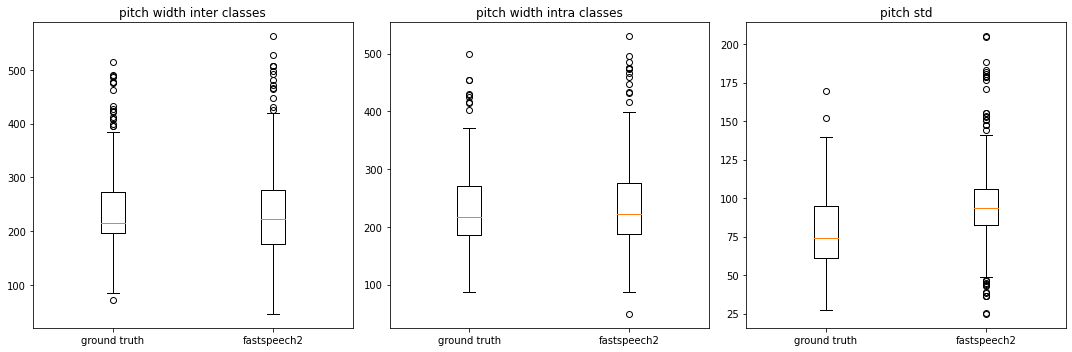

In [7]:
# bpx plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes = axes.flatten()

titles = ["pitch width inter classes", "pitch width intra classes", "pitch std"]
for i, datas in enumerate([emotion_widthes_w_all_mean, emotion_widthes_w_class_mean, emotion_variances]):
    axes[i].set_title(titles[i])
    axes[i].set_xticklabels(labels)
    axes[i].boxplot(datas)
plt.tight_layout()
plt.show()